# Preliminaries: Tensor Manipulation

This notebook walks through the basic mathematical tools for tensor methods, using **TensorLy**.

**Included is examples of the following basic operations**

1. [Creating a tensor](#Creating-a-tensor)
2. [Setting the backend](#Setting-the-backend)
3. [Basic tensor operations](#Basic-tensor-operations)
    1. [Tensor unfolding/folding](#3.1-Unfolding)
    2. [Kronecker Product](#3.3-Kronecker-Product)
    3. [Khatri-Rao Product](#3.4-Khatri-Rao-Product)
    4. [Hadamard Product](#3.5-Hadamard-Product)
    5. [Outer Product](#3.6-Outer-Product)
    6. [$n$-mode Product](#3.7-$n$-mode-Product)

In [1]:
import numpy as np
import tensorly as tl

Tensors are higher order extensions of matrices that can encode multi-dimensional structure in the data

In this tutorial we will show how to manipulate tensors as ndarrays, using [TensorLy](http://tensorly.github.io) with the NumPy backend to perform tensor operations.

# 1.Creating a tensor

A tensor can be represented in multiple ways. The simplest is the slice representation through multiple matrices.

Let's take for this example the tensor $\mathcal{\tilde X}$ defined by its frontal slices:

$$
   \mathbf{X}_1 = 
   \left[
   \begin{matrix}
   0  & 2  & 4  & 6\\
   8  & 10 & 12 & 14\\
   16 & 18 & 20 & 22
   \end{matrix}
   \right]
$$

and 

$$
   \mathbf{X}_2 =
   \left[
   \begin{matrix}
   1  & 3  & 5  & 7\\
   9  & 11 & 13 & 15\\
   17 & 19 & 21 & 23
   \end{matrix}
   \right]
$$




In Python, this array can be expressed as a numpy array::

In [2]:
X = tl.tensor(np.arange(24).reshape((3, 4, 2)), dtype=tl.float32)

In [3]:
X

array([[[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.]],

       [[ 8.,  9.],
        [10., 11.],
        [12., 13.],
        [14., 15.]],

       [[16., 17.],
        [18., 19.],
        [20., 21.],
        [22., 23.]]], dtype=float32)

You can view the frontal slices by fixing the last axis:

In [4]:
X[:, :, 0]

array([[ 0.,  2.,  4.,  6.],
       [ 8., 10., 12., 14.],
       [16., 18., 20., 22.]], dtype=float32)

In [5]:
X[:, :, 1]

array([[ 1.,  3.,  5.,  7.],
       [ 9., 11., 13., 15.],
       [17., 19., 21., 23.]], dtype=float32)

# 2.Setting the backend

In TensorLy you can dynamically set the backend to use either NumPy or MXNet to represent tensors and perform the operations:

In [6]:
type(X)

numpy.ndarray

By default, the backend is set to NumPy, here is how to change it to PyTorch:

In [7]:
tl.set_backend('pytorch')

In [8]:
X = tl.tensor(np.arange(24).reshape((3, 4, 2)))
type(X)

torch.Tensor

Let's change it back to NumPy for the rest of the tutorial.

In [9]:
tl.set_backend('numpy')

In [10]:
X = tl.tensor(np.arange(24).reshape((3, 4, 2)))
type(X)

numpy.ndarray

# 3.Basic tensor operations

## 3.1 Unfolding

Also called **matrization**, **unfolding** a tensor is done by reading the element in a given way as to obtain a matrix instead of a tensor.

It is done by stacking the **fibers** of the tensor into a matrix.

### Definition
For a tensor of size $(I_1, I_2, \cdots, I_n)$, the k-mode unfolding of this tensor will be of size $(I_k, I_1 \times \cdots \times I_{k-1} \times I_{k+1} \cdots \times I_n)$.


   Given a tensor $\mathcal{\tilde X} \in \mathbb{R}^{I_1 \times I_2 \times \cdots \times I_N}$, the
   mode-n unfolding of $\mathcal{\tilde X}$ is a matrix $\mathbf{X}_{[n]} \in \mathbb{R}^{I_n \times I_M}$,
   with $M = \prod\limits_{\substack{k=1,\\k \neq n}}^N I_k$ and is defined by
   the mapping from element $(i_1, i_2, \cdots, i_N)$ to $(i_n, j)$, with


$$
    j = \sum\limits_{\substack{k=1,\\k \neq n}}^N i_k \times \prod_{m=k+1}^N I_m.
$$

### Convention

   Traditionally, mode-1 unfolding denotes the unfolding along the first dimension.
   However, to be consistent with the Python indexing that always starts at zero,
   in tensorly, unfolding also starts at zero!

   Therefore ``unfold(tensor, 0)`` will unfold said tensor along its first dimension!
   

### Example

For instance, using the $\mathcal{\tilde X}$ previously defined:
$$
   \mathbf{X}_1 = 
   \left[
   \begin{matrix}
   0  & 2  & 4  & 6\\
   8  & 10 & 12 & 14\\
   16 & 18 & 20 & 22
   \end{matrix}
   \right]
$$

and 

$$
   \mathbf{X}_2 =
   \left[
   \begin{matrix}
   1  & 3  & 5  & 7\\
   9  & 11 & 13 & 15\\
   17 & 19 & 21 & 23
   \end{matrix}
   \right]
$$

The 0-mode unfolding of $\tilde X$:

$$
   \mathbf{\tilde X}_{[0]} =
   \left[ \begin{matrix}
      0 & 1 & 2 & 3 & 4 & 5 & 6 & 7\\
      8 & 9 & 10 & 11 & 12 & 13 & 14 & 15\\
      16 & 17 & 18 & 19 & 20 & 21 & 22 & 23\\
   \end{matrix} \right]
$$

The 1-mode unfolding is given by:

$$
   \mathbf{\tilde X}_{[1]} =
   \left[ \begin{matrix}
      0 & 1 & 8 & 9 & 16 & 17\\
      2 & 3 & 10 & 11 & 18 & 19\\
      4 & 5 & 12 & 13 & 20 & 21\\
      6 & 7 & 14 & 15 & 22 & 23\\
   \end{matrix} \right]
$$

Finally, the 2-mode unfolding is the unfolding along the last axis:

$$
   \mathbf{\tilde X}_{[2]} = \left[ \begin{matrix}
      0 & 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 & 22\\
      1 & 3 & 5 & 7 & 9 & 11 & 13 & 15 & 17 & 19 & 21 & 23\\
   \end{matrix} \right]
$$

### In TensorLy


In [11]:
tl.unfold(X, mode=0)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [12]:
tl.unfold(X, mode=1)

array([[ 0,  1,  8,  9, 16, 17],
       [ 2,  3, 10, 11, 18, 19],
       [ 4,  5, 12, 13, 20, 21],
       [ 6,  7, 14, 15, 22, 23]])

In [13]:
tl.unfold(X, mode=2)

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22],
       [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]])

## 3.2 Folding

Folding is the inverse operation: you can **fold** an unfolded tensor back from matrix to full tensor using the ``tensorly.fold`` function.

In [14]:
unfolding = tl.unfold(X, 1)
original_shape = X.shape
tl.fold(unfolding, mode=1, shape=original_shape)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

## 3.3 Kronecker Product

The *Kronecker Product* between two matrices $\mathbf{A}\in\mathbb{R}^{I_0\times I_1}$ and $\mathbf{B}\in\mathbb{R}^{J_0\times J_1}$ can be written in terms of block matrices as

$$
\mathbf{A}\otimes\mathbf{B} = \begin{bmatrix} a_{00} \mathbf{B} & \cdots & a_{0 I_1}\mathbf{B} \\ \vdots & \ddots & \vdots \\ a_{I_0 0} \mathbf{B} & \cdots & a_{I_0 I_1} \mathbf{B} \end{bmatrix}
\in \mathbb{R}^{I_0 \cdot J_0 \times I_1 \cdot J_1}.
$$

As a concrete example, we take two matrices

$$
\mathbf{A} =
\begin{bmatrix}
    1 & 2 \\ 3 & 4
\end{bmatrix},
\mathbf{B} =
\begin{bmatrix}
    5 & 6 \\ 7 & 8
\end{bmatrix}.
$$

The *Kronecker Product* is then

$$
\mathbf{A} \otimes \mathbf{B} = 
\begin{bmatrix}
    5 & 6 & 10 & 12 \\ 7 & 8 & 14 & 16 \\ 15 & 18 & 20 & 24 \\ 21 & 24 & 28 & 32
\end{bmatrix}.
$$

In **TensorLy**, we can use either the `tl.kron` method or the `tl.tenalg.kronecker` method as follows:

In [15]:
A = tl.tensor(np.arange(1, 5).reshape((2, 2)))
B = tl.tensor(np.arange(5, 9).reshape((2, 2)))

print('matrix A: \n', A)
print('matrix B: \n', B)

tl.kron(A, B)

matrix A: 
 [[1 2]
 [3 4]]
matrix B: 
 [[5 6]
 [7 8]]


array([[ 5,  6, 10, 12],
       [ 7,  8, 14, 16],
       [15, 18, 20, 24],
       [21, 24, 28, 32]])

## 3.4 Khatri-Rao Product

The *Khatri-Rao Product* between two matrices $\mathbf{A}\in\mathbb{R}^{I\times R}$ and $\mathbf{B}\in\mathbb{R}^{J\times R}$ is defined as $\mathbf{A}\odot\mathbf{B}\in\mathbb{R}^{I\cdot J\times R}$ and can written in terms of the *Kronecker Product* as

$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
  \mathbf{A}_{:, 0} \otimes \mathbf{B}_{:, 0},&
  \mathbf{A}_{:, 1} \otimes \mathbf{B}_{:, 1},&
  \cdots, &
  \mathbf{A}_{:, R-1} \otimes \mathbf{B}_{:, R-1}
\end{bmatrix}.
$$

Taking the same definitions for the matrices $\mathbf{A}$ and $\mathbf{B}$ above, the *Khatri-Rao product* is

$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    5 & 12 \\
    7 & 16 \\
    15 & 24 \\
    21 & 32
\end{bmatrix}.
$$

In **TensorLy**, we can use the `tl.kr` method to compute this, which takes a list of matrices as its input

In [16]:
print('A khatri-rao B:')
tl.kr([A, B])

A khatri-rao B:


array([[ 5, 12],
       [ 7, 16],
       [15, 24],
       [21, 32]])

## 3.5 Hadamard Product 

The Hadamard product of $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{I \times N}$ is symbolized as $\mathbf{A} * \mathbf{B}$ and is equal to ${a}_{(i, j)} {b}_{(i, j)}$ for the $(i, j)$ element.

$$
\mathbf{A} * \mathbf{B} =
\begin{bmatrix}
    5 & 12 \\
    21 & 32
\end{bmatrix}.
$$

In **TensorLy** we can compute this straight-forwardly in a backend-agnostic manner as

In [17]:
print('A hadamard B:')
A * B

A hadamard B:


array([[ 5, 12],
       [21, 32]])

## 3.6 Outer Product 

$\circ$ denotes  the vector outer product. Given a set of $N$ vectors $\{ \mathbf {x}^{(n)} \in \mathbb{R}^{I_n} \}_{n=0}^{N-1}$ their outer product is denoted as

$$ \mathcal{\tilde X} = \mathbf{x}^{(0)} \circ \mathbf{x}^{(1)} \circ \cdots \circ \mathbf{x}^{(N-1)}   \doteq  \bigcirc_{n =0}^{N-1} \mathbf{x}^{(n)} \in \mathbb{R}^{I_0 \times I_1 \times \cdots \times I_{N-1}} $$

and defines a rank-one $N$th-order tensor.

Concretely, given three vectors $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\mathbf{x}^{(3)}\in\mathbb{R}^2$ we can compute their outer product by first computing the kronecker product and then reshaping into a tensor as follows

In [18]:
x1 = tl.tensor(np.arange(1, 3).reshape((2)))
x2 = tl.tensor(np.arange(3, 5).reshape((2)))
x3 = tl.tensor(np.arange(5, 7).reshape((2)))

print(tl.tenalg.kronecker([x1, x2, x3]).reshape(2, 2, 2))

[[[15 18]
  [20 24]]

 [[30 36]
  [40 48]]]


## 3.7 $n$-mode Product

Also known as **tensor contraction**. This is a natural generalization of matrix-vector and matrix-matrix product. When multiplying a tensor by a matrix or a vector, we now have to specify the **mode** $n$ along which to take the product.
### Tensor times matrix

In that case we are doing an operation analogous to a matrix multiplication on the $n$-th mode. Given a tensor $\mathcal{\tilde X}$ of size $(I_1, I_2, \cdots, I_N)$, and a matrix $\mathbf{M}$ of size $(D, I_n)$, the $n$-mode product of $\mathcal{\tilde X}$ by $\mathbf{M}$ is written $\mathcal{\tilde X} \times_n \mathbf{M}$ and is of size $(I_k, I_1 \times \cdots \times I_{n-1} \times D \times I_{n+1} \cdots \times I_n)$.

### Tensor times vector

In that case we are contracting over the $n$-th mode by multiplying it with a vector. Given a tensor $\mathcal{\tilde X}$ of size $(I_1, I_2, \cdots, I_N)$, and a vector $\mathbf{v}$ of size $(I_n)$, the $n$-mode product of $\mathcal{\tilde X}$ by $\mathbf{v}$ is written $\mathcal{\tilde X} \times_n \mathbf{v}$ and is of size $(I_k, I_1 \times \cdots \times I_{n-1} \times I_{n+1} \cdots \times I_n)$.


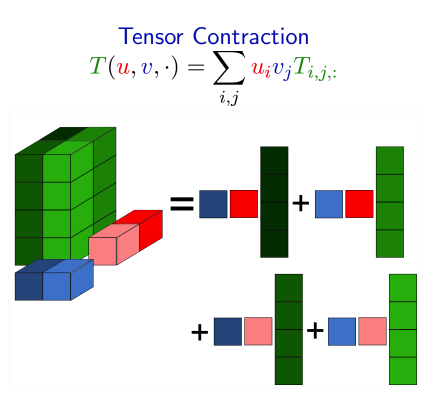

In [19]:
from IPython.display import Image, display
display(Image(filename='./images/tensor_contraction.png', embed=True))

### Example

In TensorLy, all the tensor algebra functions are located in the `tensorly.tenalg` module. For the n-mode product, you will need to use the function `mode_dot` that works transparently for multiplying a tensor by a matrix or a vector along a given mode.

#### Tensor times matrix

With the tensor $\mathcal{\tilde X}$ of size (3, 4, 2) we defined previously, let's define a matrix $\mathbf{M}$ of size (5, 4) to multiply along the second mode:

In [20]:
M = tl.tensor(np.arange(4*5).reshape((5, 4)))
print(M.shape)

(5, 4)


Keep in mind indexing starts at zero, so the second mode is represented by `mode=1`:

In [21]:
res = tl.tenalg.mode_dot(X, M, mode=1)

As expected the result is of shape (3, 5, 2)

In [22]:
res.shape

(3, 5, 2)

#### Tensor times vector

Similarly, we can contract along the mode 1 with a vector of size 4 (our tensor is of size (3, 4, 2).


In [23]:
v = tl.tensor(np.arange(4))
print(v.shape)

(4,)


In [24]:
v

array([0, 1, 2, 3])

In [25]:
X

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [26]:
res = tl.tenalg.mode_dot(X, v, mode=1)

Recall that $\mathcal{\tilde X}$ is of shape (3, 4, 2). We are here contracting over its 2nd mode. 

Since we have multiplied by a vector, we have effectively contracted out one mode of the tensor so the result will be of matrix of size (3, 2). 

In [27]:
res.shape

(3, 2)

In [28]:
res

array([[ 28,  34],
       [ 76,  82],
       [124, 130]])

Here, we could form each column (fiber) of the result, by taking the dot product between the frontal slices of $\mathcal{\tilde X}$ and the vector:

In [29]:
X[:, :, 0] @ v

array([ 28,  76, 124])

In [30]:
X[:, :, 1] @ v

array([ 34,  82, 130])

We can form the whole product by concanating these as the column of the resulting matrix:

In [31]:
np.stack([X[:, :, 0] @ v, X[:, :, 1] @ v]).T

array([[ 28,  34],
       [ 76,  82],
       [124, 130]])

We could equivalently use the mode-0 slices:

In [32]:
for i in range(3):
    print(X[i, ...].T @ v)

[28 34]
[76 82]
[124 130]


Again, we can form the whole result by stacking these as the rows of the matrix:

In [33]:
np.vstack([X[i, ...].T @ v for i in range(3)])

array([[ 28,  34],
       [ 76,  82],
       [124, 130]])